## Spring-boot analysis

In [ ]:
import project_data
import importlib
importlib.reload(project_data)
from project_data import ProjectData

data_spring_boot = ProjectData.import_for_project_from_csv("../data/data.csv", "spring-boot")

# ---------------------
# 5 highest call traces
# ---------------------
# Gets the 5 more energy intensive call traces
highest_spring_boot = data_spring_boot.filter_highest()
# Shows their mean and standard deviation for comparison with the ones from the csv file
highest_spring_boot.show_mean_and_std_dev()
# Plots the distribution of the call traces and exports them to pdf
highest_spring_boot.plot_quantiles(highest=True, save=True)

# --------------------
# 5 lowest call traces
# --------------------
lowest_spring_boot = data_spring_boot.filter_lowest()
lowest_spring_boot.show_mean_and_std_dev()
lowest_spring_boot.plot_quantiles(highest=False, save=True)

## Spoon analysis

In [ ]:
from project_data import ProjectData

data_spoon = ProjectData.import_for_project_from_csv("../data/data.csv", "spoon")

highest_spoon = data_spoon.filter_highest()
highest_spoon.show_mean_and_std_dev()
highest_spoon.plot_quantiles(highest=True, save=True)

lowest_spoon = data_spoon.filter_lowest()
lowest_spoon.show_mean_and_std_dev()
lowest_spoon.plot_quantiles(highest=False, save=True)

## Correlation test

In [ ]:
import project_data
import importlib
importlib.reload(project_data)
from project_data import ProjectData
import scipy.stats as stats

data_spring_boot = ProjectData.import_for_project_from_csv("../data/data.csv", "spring-boot")
data_spoon = ProjectData.import_for_project_from_csv("../data/data.csv", "spoon")

total_mean = data_spring_boot.get_means()
mean_spoon = data_spoon.get_means()
total_mean.extend(mean_spoon)

total_parameters = [203, 250, 26, 181, 153, 0, 41, 25, 0, 0, 500, 0, 0, 446, 0, 0, 0, 0, 0, 0]

Importing data for project 'spring-boot' from ../data/data.csv...
Importing data for project 'spoon' from ../data/data.csv...
[np.float64(80.47241074698312), np.float64(29.63726885565396), np.float64(15.579353427886963), np.float64(34.84635866099391), np.float64(24.81607588406267), np.float64(2.9318115436113796), np.float64(3.0152807464966407), np.float64(2.6675714445965633), np.float64(2.460612006187439), np.float64(2.983523988723755)]
[np.float64(103.53789672851562), np.float64(113.7665008544922), np.float64(318.0745788574219), np.float64(78.41664600372314), np.float64(222.32475385994746), np.float64(0.3051482724218533), np.float64(0.3762433332701524), np.float64(0.3114068964175109), np.float64(0.3119482744870515), np.float64(0.18190714171422379)]


In [13]:
correlation, p_value = stats.spearmanr(total_mean, total_parameters)

print(f"Spearman's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("No statistically significant correlation found.")

Spearman's correlation coefficient: 0.43949500865145996
P-value: 0.05251210341397542
No statistically significant correlation found.


In [ ]:
tau, p_value = stats.kendalltau(total_mean, total_parameters)

print(f"Kendall's tau: {tau}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("No statistically significant correlation found.")

Kendall's tau: 0.43082947332757926
P-value: 0.013788924055670733
There is a statistically significant correlation.


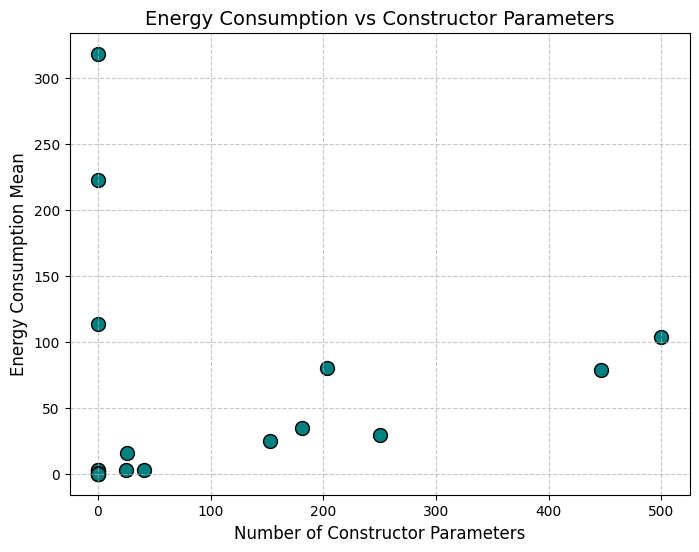

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(total_parameters, total_mean, color='teal', edgecolors='black', s=100)

# Add labels and title
plt.title('Energy Consumption vs Constructor Parameters', fontsize=14)
plt.xlabel('Number of Constructor Parameters', fontsize=12)
plt.ylabel('Energy Consumption Mean', fontsize=12)

# Optional: Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()